In [1]:
#Description: A simple moving average trading strategy Using python
# import liberies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [2]:
# Load the data
df=yf.Ticker('AAPL').history(start='2021-1-19',end='2022-12-2')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-19,126.264280,127.183257,125.434248,126.313690,90757300,0.0,0
2021-01-20,127.133862,130.918433,127.025166,130.463882,104319500,0.0,0
2021-01-21,132.212899,138.013265,132.005383,135.246475,120150900,0.0,0
2021-01-22,134.663436,138.191096,133.418387,137.420349,114459400,0.0,0
2021-01-25,141.372915,143.368943,134.920360,141.224686,157611700,0.0,0
...,...,...,...,...,...,...,...
2022-11-25,148.309998,148.880005,147.119995,148.110001,35195900,0.0,0
2022-11-28,145.139999,146.639999,143.380005,144.220001,69246000,0.0,0
2022-11-29,144.289993,144.809998,140.350006,141.169998,83763800,0.0,0


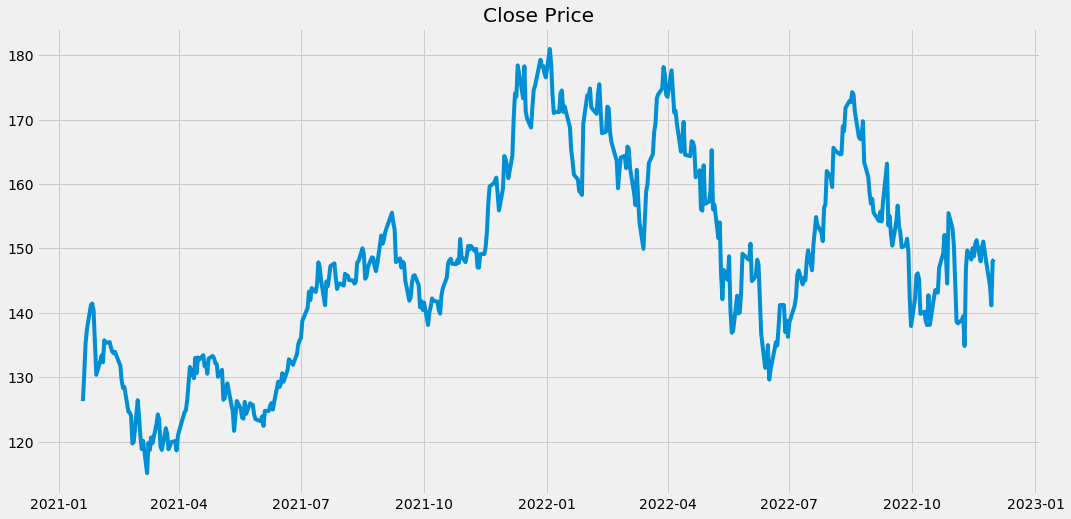

In [3]:
#Visualize the close price
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])

In [4]:
def SMA(data,period=30,column='Close'):
    return data[column].rolling(window=period).mean()

In [5]:
df['SMA30']=SMA(df)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA30
Date,,,,,,,,
2021-01-19,126.264280,127.183257,125.434248,126.313690,90757300,0.0,0,NaN
2021-01-20,127.133862,130.918433,127.025166,130.463882,104319500,0.0,0,NaN
2021-01-21,132.212899,138.013265,132.005383,135.246475,120150900,0.0,0,NaN
2021-01-22,134.663436,138.191096,133.418387,137.420349,114459400,0.0,0,NaN
2021-01-25,141.372915,143.368943,134.920360,141.224686,157611700,0.0,0,NaN
...,...,...,...,...,...,...,...,...
2022-11-25,148.309998,148.880005,147.119995,148.110001,35195900,0.0,0,146.324293
2022-11-28,145.139999,146.639999,143.380005,144.220001,69246000,0.0,0,146.526598
2022-11-29,144.289993,144.809998,140.350006,141.169998,83763800,0.0,0,146.493126


In [6]:
def strategy(df):
    buy=[]
    sell=[]
    flag=0
    buy_price=0
    
    for i in range(0,len(df)):
        if df['SMA30'][i]>df['Close'][i] and flag==0:
            buy.append(df['Close'][i])
            sell.append(np.nan)
            buy_price=df['Close'][i]
            flag=1
        elif df['SMA30'][i]<df['Close'][i] and flag==1 and buy_price<df['Close'][i]:
            sell.append(df['Close'][i])
            buy.append(np.nan)
            buy_price=0
            flag=0
        else:
            sell.append(np.nan)
            buy.append(np.nan)
    return(buy,sell)

In [7]:
#Get the buy and sell list
strat=strategy(df)
df['Buy']=strat[0]
df['Sell']=strat[1]

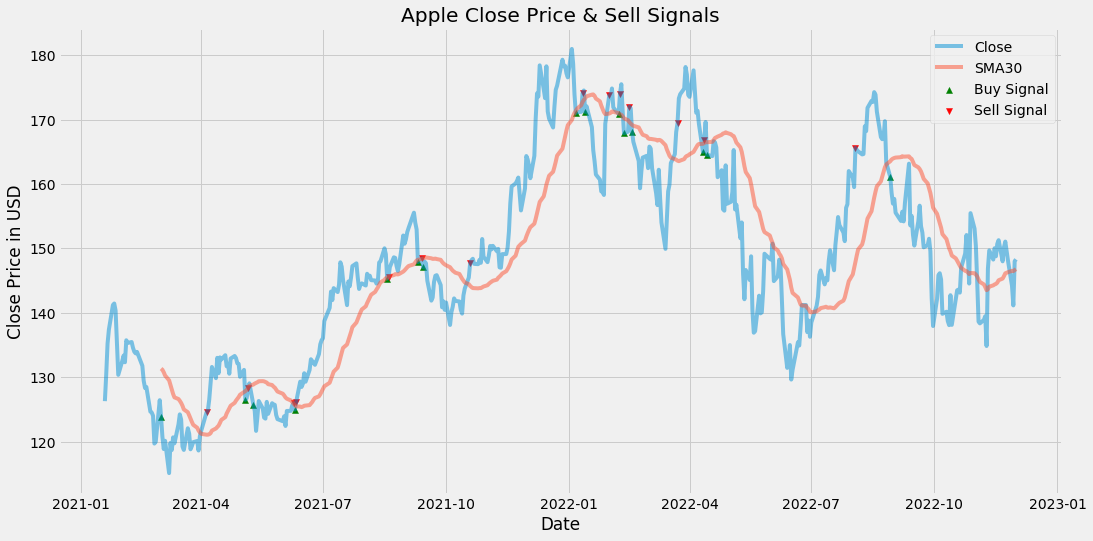

In [8]:
#Visualize the Close Price and buy and sell signals
plt.figure(figsize=(16,8))
plt.title('Apple Close Price & Sell Signals')
plt.plot(df['Close'],alpha=0.5,label='Close')
plt.plot(df['SMA30'],alpha=0.5,label='SMA30')
plt.scatter(df.index,df['Buy'],color='green',label='Buy Signal',marker='^')
plt.scatter(df.index,df['Sell'],color='red',label='Sell Signal',marker='v')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.legend()
plt.show()